<a href="https://colab.research.google.com/github/gabrieldimas/periapical-photo-caries-detection-using-deep-learning/blob/main/selected_model_tuning_parameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extract Dataset, Import

In [1]:
import zipfile
import os

zip_path = "/content/segmented_teeth_v5_test1.zip"
extract_to = "/content/dataset"

os.makedirs(extract_to, exist_ok=True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"File berhasil diekstrak ke: {extract_to}")

File berhasil diekstrak ke: /content/dataset


In [2]:
!pip install ultralytics

from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [5]:
import torch
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Training Rotation, Scaling, Shearing, Translation using Nano

In [3]:
model = YOLO('yolov8n-cls.pt')
model.train(
    data="/content/dataset",
    epochs=100,
    imgsz=320,
    batch=16,
    augment=True,
    degrees=30,
    fliplr=0,
    flipud=0,
    scale=0.3,
    shear=5,
    translate=0.2
)

100%|██████████| 5.31M/5.31M [00:00<00:00, 84.1MB/s]


Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=30, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0, flipud=0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profil

100%|██████████| 5.35M/5.35M [00:00<00:00, 93.0MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 1.0±2.2 ms, read: 2.5±1.2 MB/s, size: 4.4 KB)


train: Scanning /content/dataset/train... 428 images, 0 corrupt: 100%|██████████| 428/428 [00:00<00:00, 973.93it/s]

train: New cache created: /content/dataset/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 4.4±4.4 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<00:00, 1096.78it/s]

val: New cache created: /content/dataset/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.447G       1.13         16        320:  26%|██▌       | 7/27 [00:02<00:04,  4.67it/s]

      1/100     0.447G      1.105         16        320:  37%|███▋      | 10/27 [00:03<00:03,  4.79it/s]
100%|██████████| 755k/755k [00:00<00:00, 21.5MB/s]
      1/100     0.449G      1.084         12        320: 100%|██████████| 27/27 [00:05<00:00,  4.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all      0.442          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.557G          1         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.84it/s]

                   all      0.385          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.564G     0.8939         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.38it/s]

                   all      0.481          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.572G     0.7993         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.99it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      0.58G     0.6947         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.98it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      0.59G     0.6205         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.30it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.598G     0.5318         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.48it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.605G     0.4804         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.57it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.613G     0.4668         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.33it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.623G     0.3995         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.67it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.631G     0.3639         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.83it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.639G     0.3503         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.82it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.646G     0.3275         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.01it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.654G      0.273         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.16it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100     0.662G      0.269         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.17it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100     0.672G     0.2933         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.23it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      0.68G     0.2959         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.60it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100     0.688G     0.1909         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.14it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100     0.695G     0.2237         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.86it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.99it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100     0.703G      0.165         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.93it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100     0.711G     0.1823         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.39it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100     0.721G     0.1616         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.04it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100     0.729G     0.2086         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.81it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100     0.736G     0.1426         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.18it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100     0.744G      0.127         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.76it/s]

                   all      0.788          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100     0.752G     0.2213         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.92it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100     0.762G      0.181         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.16it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      0.77G     0.1547         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.14it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100     0.777G     0.1413         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.69it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100     0.785G     0.1425         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.81it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100     0.793G     0.1221         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.61it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100     0.801G     0.1174         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.25it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100     0.809G     0.1014         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.06it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100     0.818G     0.1156         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.37it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100     0.826G     0.1351         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.86it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100     0.834G     0.1353         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.71it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100     0.842G     0.1145         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.10it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      0.85G     0.1029         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.71it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100     0.859G     0.1036         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.16it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100     0.867G    0.07214         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.93it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100     0.875G    0.07359         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.02it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100     0.883G     0.1365         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.01it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100     0.891G    0.09344         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.69it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100     0.898G     0.0815         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.51it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100     0.906G     0.1028         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.90it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.94it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100     0.916G    0.08144         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.84it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100     0.924G    0.06692         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.24it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100     0.932G    0.08268         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.94it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100     0.939G    0.04908         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.17it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100     0.949G    0.04702         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.92it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100     0.957G    0.06866         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.43it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.59it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100     0.965G    0.06562         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.94it/s]


                   all      0.731          1

      Epoch    GPU_mem       loss  Instances       Size


     53/100     0.973G    0.06998         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.80it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100      0.98G    0.04718         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 48.19it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100     0.988G    0.06754         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.51it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100     0.996G    0.04871         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.31it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100         1G    0.05842         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.63it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100      1.01G    0.04341         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.66it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      1.02G    0.04544         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.77it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      1.03G    0.03445         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.48it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      1.04G    0.06052         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.27it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100      1.05G    0.08433         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.18it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100      1.05G    0.02812         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.91it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.39it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100      1.06G    0.04544         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.31it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100      1.07G    0.05421         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.71it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100      1.08G    0.02098         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.06it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      1.09G    0.04581         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.88it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100      1.09G    0.05242         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.68it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100       1.1G    0.04169         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.62it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100      1.11G    0.06311         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.08it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100      1.12G    0.03061         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.91it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100      1.13G    0.04196         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.62it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100      1.13G    0.04486         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.38it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100      1.14G    0.03798         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.16it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100      1.15G    0.04529         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.47it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100      1.16G    0.03861         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.36it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.29it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100      1.17G    0.01792         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.65it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100      1.18G    0.02357         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.14it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100      1.18G    0.03761         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 42.17it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100      1.19G    0.04179         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 41.16it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100       1.2G    0.03506         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.39it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100      1.21G    0.04743         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.01it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100      1.22G    0.01449         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.45it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100      1.23G    0.03582         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 40.05it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100      1.23G    0.02916         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.98it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100      1.24G    0.03691         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.82it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100      1.25G    0.04337         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.00it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100      1.26G    0.04442         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 47.22it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100      1.27G    0.03822         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.39it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100      1.28G    0.02566         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.38it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100      1.28G    0.03173         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.44it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100      1.29G    0.02822         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.78it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100       1.3G     0.0279         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.96it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100      1.31G    0.02759         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.39it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100      1.31G    0.01579         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.31it/s]


                   all      0.731          1

      Epoch    GPU_mem       loss  Instances       Size


     96/100      1.32G    0.02065         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.66it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.16it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100      1.33G    0.03153         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.11it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100      1.34G     0.0309         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 38.78it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100      1.35G    0.01012         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.45it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100      1.36G    0.01868         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.61it/s]

                   all      0.731          1



100 epochs completed in 0.118 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,438,723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.24it/s]


                   all      0.769          1
Speed: 0.1ms preprocess, 1.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7846e6dcbb50>
curves: []
curves_results: []
fitness: 0.8846153914928436
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7692307829856873, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8846153914928436}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.13323440384738205, 'inference': 1.1720872499989372, 'loss': 0.000392500000911101, 'postprocess': 0.0006493461538726619}
task: 'classify'
top1: 0.7692307829856873
top5: 1.0

In [4]:
metrics = model.val(data='/content/dataset')
print(metrics)

Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,438,723 parameters, 0 gradients, 3.3 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 397.6±413.7 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  25%|██▌       | 1/4 [00:00<00:00,  3.58it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 2/4 [00:00<00:00,  4.06it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  75%|███████▌  | 3/4 [00:00<00:00,  3.93it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  4.02it/s]


                   all      0.788          1
Speed: 4.8ms preprocess, 5.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7847d66d2a10>
curves: []
curves_results: []
fitness: 0.8942307829856873
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7884615659713745, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8942307829856873}
save_dir: PosixPath('runs/classify/train2')
speed: {'preprocess': 4.824791519231789, 'inference': 5.179406519230357, 'loss': 0.022989519228881015, 'postprocess': 0.0022826538449512903}
task: 'classify'
top1: 0.7884615659713745
top5: 1.0


WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-s

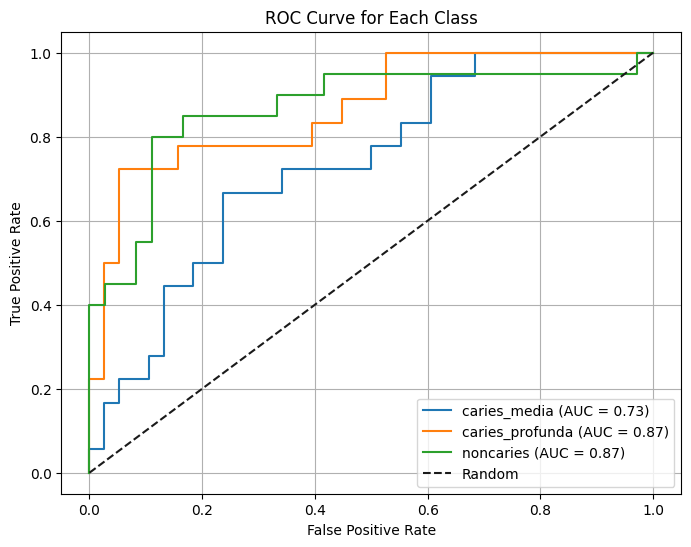

In [9]:

# Ambil semua gambar dari folder test
test_images = list(Path('/content/dataset/test').rglob('*.jpg'))

# Ambil kelas dari model
classes_dict = model.names
classes = [classes_dict[i] for i in range(len(classes_dict))]  # Ubah ke list ['noncaries', 'caries_media', ...]

num_classes = len(classes)

# Prediksi semua gambar
y_true = []
y_score = []

for img_path in test_images:
    label = img_path.parent.name
    label_idx = classes.index(label)

    result = model(img_path, verbose=False)[0]
    probs = result.probs.data.cpu().numpy()

    y_true.append(label_idx)
    y_score.append(probs)

# One-hot encoding dan AUC
y_true = label_binarize(y_true, classes=list(range(num_classes)))
y_score = np.array(y_score)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot grafik
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-s

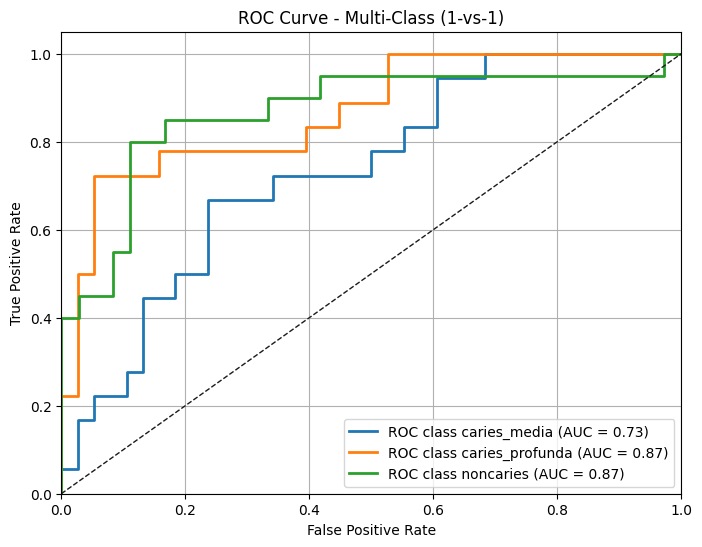

In [10]:
from pathlib import Path
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Ambil semua gambar dari folder test
test_images = list(Path('/content/dataset/test').rglob('*.jpg'))

# Ambil kelas dari model
classes_dict = model.names
classes = [classes_dict[i] for i in range(len(classes_dict))]

num_classes = len(classes)

# Simpan label ground truth dan prediksi probabilitas
y_true = []
y_score = []

for img_path in test_images:
    label = img_path.parent.name
    label_idx = classes.index(label)
    y_true.append(label_idx)

    # Prediksi menggunakan model
    result = model(img_path, verbose=False)[0]
    probs = result.probs.data.tolist()  # Probabilitas prediksi
    y_score.append(probs)

# Binarisasi label
y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))  # shape (n_samples, n_classes)
y_score = np.array(y_score)

# Plot ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class (1-vs-1)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Training Rotation, Scaling, Shearing, Translation using Small

In [11]:
model = YOLO('yolov8s-cls.pt')
model.train(
    data="/content/dataset",
    epochs=100,
    imgsz=320,
    batch=16,
    augment=True,
    degrees=30,
    fliplr=0,
    flipud=0,
    scale=0.3,
    shear=5,
    translate=0.2
)

100%|██████████| 12.3M/12.3M [00:00<00:00, 88.3MB/s]


Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=30, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0, flipud=0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profi

train: Scanning /content/dataset/train... 428 images, 0 corrupt: 100%|██████████| 428/428 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 162.1±108.4 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/classify/train3
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100     0.805G      1.068         12        320: 100%|██████████| 27/27 [00:05<00:00,  4.51it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  9.51it/s]

                   all      0.404          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100     0.977G     0.9979         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.11it/s]

                   all      0.404          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100     0.977G     0.8353         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.04it/s]

                   all      0.423          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100     0.977G     0.7678         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.47it/s]


                   all      0.519          1

      Epoch    GPU_mem       loss  Instances       Size


      5/100     0.977G     0.5716         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.71it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100     0.977G     0.5746         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.51it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100     0.977G     0.4988         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.96it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100     0.977G     0.4174         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 35.97it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100     0.977G     0.3203         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.55it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.89it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100     0.977G     0.3383         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.22it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100     0.977G     0.3212         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.41it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.04it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100     0.977G     0.3013         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.16it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100     0.977G     0.3058         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.65it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100     0.977G     0.2197         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.46it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100       1.1G     0.2014         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.87it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100       1.1G     0.2283         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.79it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.45it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      1.11G     0.2787         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 43.76it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      1.12G      0.165         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.04it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      1.12G     0.1522         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.03it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100      1.13G     0.1691         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.83it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      1.13G     0.1828         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.78it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      1.14G     0.1597         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 39.77it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      1.14G     0.1756         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.34it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      1.14G     0.1483         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.81it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      1.14G      0.136         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.56it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.97it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      1.14G     0.1835         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.82it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      1.14G     0.1216         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.33it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      1.14G    0.09759         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.91it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      1.14G    0.09142         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.40it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      1.14G      0.115         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.05it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      1.14G    0.09688         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.93it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      1.14G    0.08511         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.19it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      1.14G    0.09051         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 37.67it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      1.14G    0.08663         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.75it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      1.14G    0.09129         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.47it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      1.14G     0.1124         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.86it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      1.14G    0.06109         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.27it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      1.14G    0.08858         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.16it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      1.14G    0.08092         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.53it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100      1.14G    0.07135         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.44it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100      1.15G     0.0788         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.27it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      1.15G    0.06849         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.53it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100      1.15G    0.05562         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.86it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100      1.15G    0.04906         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.09it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100      1.15G    0.05841         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 32.98it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100      1.15G    0.04078         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.24it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      1.15G    0.05127         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.29it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100      1.15G      0.057         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.00it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100      1.15G    0.05918         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.91it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100      1.15G    0.03898         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 36.41it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100      1.15G    0.04463         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 31.10it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100      1.15G    0.04527         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.02it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.87it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100      1.15G    0.05753         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.30it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100      1.15G    0.03692         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.18it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100      1.15G    0.03103         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.34it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      1.15G    0.04846         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.91it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      1.15G     0.0691         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.33it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.25it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100      1.15G    0.03562         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.87it/s]

                   all       0.75          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      1.15G    0.04835         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.92it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      1.15G    0.03935         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 33.81it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      1.15G    0.04893         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.62it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100      1.15G    0.04164         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.94it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.30it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100      1.15G     0.0278         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 38.46it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100      1.15G    0.03903         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.88it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100      1.15G    0.06336         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 34.24it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100      1.15G    0.01699         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.59it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      1.15G    0.04759         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.85it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100      1.15G    0.04057         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.07it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100      1.15G    0.02016         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.57it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100      1.15G    0.05326         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.13it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100      1.15G    0.03833         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.57it/s]


                   all      0.692          1

      Epoch    GPU_mem       loss  Instances       Size


     72/100      1.15G    0.02159         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.29it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.87it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100      1.15G     0.0473         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.97it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100      1.15G    0.01837         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.82it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100      1.15G    0.01816         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.49it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.39it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100      1.15G    0.02556         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.35it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100      1.15G     0.0173         12        320: 100%|██████████| 27/27 [00:05<00:00,  4.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.43it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100      1.15G    0.01794         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 30.86it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100      1.15G    0.02828         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 28.95it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100      1.15G    0.01841         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.55it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100      1.15G    0.01792         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.10it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100      1.15G    0.02249         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.97it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100      1.15G    0.02349         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.40it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100      1.15G    0.02544         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.22it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100      1.15G    0.01241         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 26.81it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100      1.15G    0.01997         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.11it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100      1.15G    0.02203         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.30it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100      1.15G    0.01196         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.42it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100      1.15G    0.01534         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.42it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.43it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100      1.15G    0.01197         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.44it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100      1.15G   0.009651         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 29.39it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100      1.15G    0.01446         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.31it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100      1.15G   0.009729         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.64it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100      1.15G    0.01936         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.31it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100      1.15G    0.01166         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.95it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100      1.15G    0.01104         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.82it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100      1.15G   0.004889         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 27.82it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100      1.15G     0.0155         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.16it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100      1.15G   0.009391         12        320: 100%|██████████| 27/27 [00:05<00:00,  5.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.76it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100      1.15G    0.01037         12        320: 100%|██████████| 27/27 [00:05<00:00,  4.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.32it/s]

                   all      0.654          1



100 epochs completed in 0.124 hours.
Optimizer stripped from runs/classify/train3/weights/last.pt, 10.3MB
Optimizer stripped from runs/classify/train3/weights/best.pt, 10.3MB

Validating runs/classify/train3/weights/best.pt...
Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-cls summary (fused): 30 layers, 5,079,043 parameters, 0 gradients, 12.5 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.23it/s]


                   all       0.75          1
Speed: 0.2ms preprocess, 1.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train3


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7846e6fdf750>
curves: []
curves_results: []
fitness: 0.875
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.75, 'metrics/accuracy_top5': 1.0, 'fitness': 0.875}
save_dir: PosixPath('runs/classify/train3')
speed: {'preprocess': 0.19056615384617823, 'inference': 1.4010892500008454, 'loss': 0.00046311538863637205, 'postprocess': 0.0007350384626428981}
task: 'classify'
top1: 0.75
top5: 1.0

In [12]:
metrics = model.val(data='/content/dataset')
print(metrics)

Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-cls summary (fused): 30 layers, 5,079,043 parameters, 0 gradients, 12.5 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 265.4±150.1 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  25%|██▌       | 1/4 [00:00<00:00,  3.67it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 2/4 [00:00<00:00,  5.41it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  75%|███████▌  | 3/4 [00:00<00:00,  4.82it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  4.60it/s]


                   all       0.75          1
Speed: 5.5ms preprocess, 5.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train32
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7846e6e16710>
curves: []
curves_results: []
fitness: 0.875
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.75, 'metrics/accuracy_top5': 1.0, 'fitness': 0.875}
save_dir: PosixPath('runs/classify/train32')
speed: {'preprocess': 5.496013499999628, 'inference': 5.1792034038446495, 'loss': 0.0011160192343595554, 'postprocess': 0.0019116538396701799}
task: 'classify'
top1: 0.75
top5: 1.0


WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-s

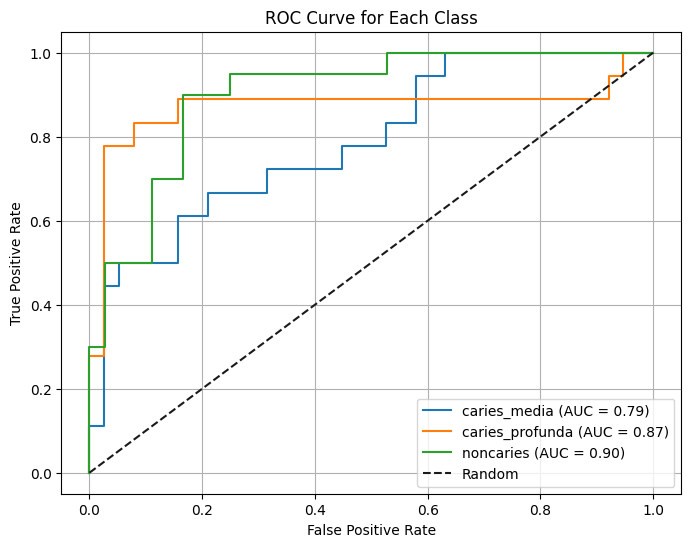

In [13]:

# Ambil semua gambar dari folder test
test_images = list(Path('/content/dataset/test').rglob('*.jpg'))

# Ambil kelas dari model
classes_dict = model.names
classes = [classes_dict[i] for i in range(len(classes_dict))]  # Ubah ke list ['noncaries', 'caries_media', ...]

num_classes = len(classes)

# Prediksi semua gambar
y_true = []
y_score = []

for img_path in test_images:
    label = img_path.parent.name
    label_idx = classes.index(label)

    result = model(img_path, verbose=False)[0]
    probs = result.probs.data.cpu().numpy()

    y_true.append(label_idx)
    y_score.append(probs)

# One-hot encoding dan AUC
y_true = label_binarize(y_true, classes=list(range(num_classes)))
y_score = np.array(y_score)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot grafik
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-s

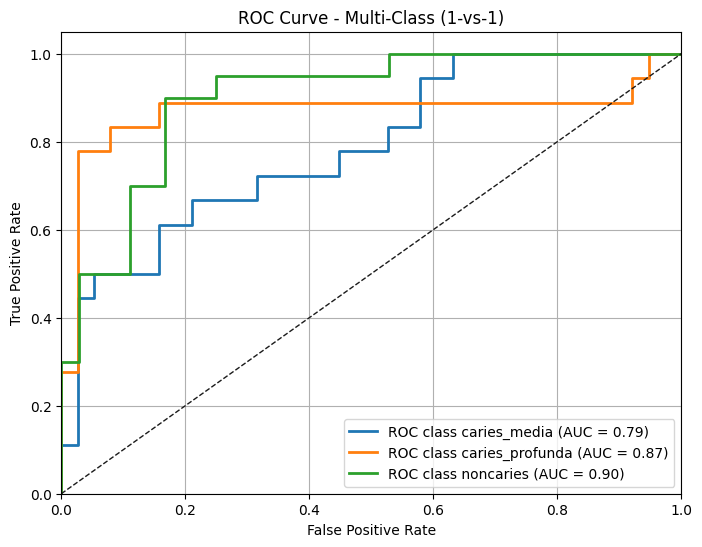

In [14]:
from pathlib import Path
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Ambil semua gambar dari folder test
test_images = list(Path('/content/dataset/test').rglob('*.jpg'))

# Ambil kelas dari model
classes_dict = model.names
classes = [classes_dict[i] for i in range(len(classes_dict))]

num_classes = len(classes)

# Simpan label ground truth dan prediksi probabilitas
y_true = []
y_score = []

for img_path in test_images:
    label = img_path.parent.name
    label_idx = classes.index(label)
    y_true.append(label_idx)

    # Prediksi menggunakan model
    result = model(img_path, verbose=False)[0]
    probs = result.probs.data.tolist()  # Probabilitas prediksi
    y_score.append(probs)

# Binarisasi label
y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))  # shape (n_samples, n_classes)
y_score = np.array(y_score)

# Plot ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class (1-vs-1)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Training Rotation, Scaling, Shearing, Translation using Medium

In [15]:
model = YOLO('yolov8m-cls.pt')
model.train(
    data="/content/dataset",
    epochs=100,
    imgsz=320,
    batch=16,
    augment=True,
    degrees=30,
    fliplr=0,
    flipud=0,
    scale=0.3,
    shear=5,
    translate=0.2
)

100%|██████████| 32.7M/32.7M [00:00<00:00, 238MB/s]


Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset, degrees=30, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0, flipud=0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profi

train: Scanning /content/dataset/train... 428 images, 0 corrupt: 100%|██████████| 428/428 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 165.0±95.1 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 38 weight(decay=0.0), 39 weight(decay=0.0005), 39 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs/classify/train4
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      1.45G      1.099         12        320: 100%|██████████| 27/27 [00:05<00:00,  4.52it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all      0.346          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      1.72G     0.9938         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 11.59it/s]

                   all      0.462          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      1.73G     0.8085         12        320: 100%|██████████| 27/27 [00:05<00:00,  5.31it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.09it/s]

                   all      0.423          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      1.74G     0.7355         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.69it/s]

                   all      0.481          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      1.74G     0.5307         12        320: 100%|██████████| 27/27 [00:03<00:00,  6.81it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.74it/s]

                   all      0.442          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      1.74G     0.5182         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.12it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      1.74G     0.5008         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.37it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100      1.77G     0.4587         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.58it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100      1.77G     0.3634         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.71it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      1.77G     0.3445         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.62it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      1.77G     0.3043         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.99it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      1.79G     0.2586         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.46it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.92it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      1.79G     0.3125         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.50it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      1.98G     0.2914         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.32it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.88it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      1.98G     0.2839         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.95it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100         2G     0.3045         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.73it/s]

                   all      0.558          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100         2G     0.2598         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.44it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100         2G     0.2004         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.60it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.59it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100         2G     0.1537         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.81it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100         2G     0.1369         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.82it/s]

                   all      0.519          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100         2G     0.1685         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.26it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100         2G      0.112         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.39it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      2.03G     0.1493         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.78it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      2.03G     0.1054         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.36it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      2.03G     0.1349         12        320: 100%|██████████| 27/27 [00:03<00:00,  8.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.10it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      2.03G     0.1254         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.98it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      2.03G     0.1475         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.60it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      2.03G     0.1091         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.96it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      2.03G     0.1187         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.15it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      2.03G     0.1296         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.26it/s]

                   all        0.5          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      2.03G     0.1002         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.78it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100      2.03G     0.1153         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.79it/s]


                   all      0.577          1

      Epoch    GPU_mem       loss  Instances       Size


     33/100      2.03G     0.1153         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.24it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      2.03G      0.119         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.52it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      2.03G    0.08703         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.58it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      2.03G    0.06901         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.63it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      2.03G     0.0646         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.59it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.75it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      2.03G     0.0594         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.78it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      2.03G    0.06536         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.39it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100      2.03G    0.04293         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.64it/s]


                   all      0.558          1

      Epoch    GPU_mem       loss  Instances       Size


     41/100      2.03G    0.04508         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.65it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      2.03G    0.06153         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.06it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100      2.03G    0.04466         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.07it/s]

                   all      0.577          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100      2.03G    0.04051         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.49it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100      2.03G    0.04333         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.41it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100      2.03G    0.03093         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.30it/s]

                   all      0.712          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      2.03G    0.03992         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.73it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.80it/s]

                   all      0.731          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100      2.03G    0.02516         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.82it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100      2.03G    0.04881         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.53it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.84it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100      2.03G    0.02852         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.41it/s]

                   all      0.538          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100      2.03G     0.0421         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.97it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.40it/s]


                   all      0.615          1

      Epoch    GPU_mem       loss  Instances       Size


     52/100      2.03G     0.0496         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.78it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.89it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100      2.04G     0.0367         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.01it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100      2.15G    0.02766         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.89it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100      2.16G    0.02138         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.89it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      2.19G    0.01271         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.73it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      2.19G    0.02247         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.07it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100      2.19G    0.03142         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.02it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      2.19G    0.02363         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.41it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      2.21G    0.02315         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.69it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.95it/s]

                   all      0.596          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      2.21G    0.02085         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.72it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.52it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100       2.4G    0.04318         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.99it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100       2.4G    0.01418         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.68it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.85it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100      2.42G     0.0212         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.75it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.03it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100      2.42G    0.02955         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.74it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.42it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100      2.42G    0.01926         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.35it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.53it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      2.42G    0.03186         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.38it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.03it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100      2.42G    0.02308         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.65it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.92it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100      2.42G   0.007749         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.14it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100      2.42G    0.02564         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.30it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100      2.42G    0.02814         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.23it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100      2.42G     0.0236         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.40it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.49it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100      2.42G    0.02532         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.56it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100      2.42G    0.01472         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.98it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100      2.42G    0.01847         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.96it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100      2.42G     0.0138         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.58it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 18.45it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100      2.42G    0.02246         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.23it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100      2.42G    0.01655         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.44it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 14.32it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100      2.42G    0.01168         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.54it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.31it/s]

                   all      0.615          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100      2.42G    0.03067         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.56it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100      2.42G   0.009088         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.76it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 21.91it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100      2.42G    0.01617         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 24.57it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100      2.42G     0.0118         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.64it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100      2.42G    0.01118         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.26it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100      2.42G    0.01051         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.64it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100      2.42G    0.02633         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.47it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 13.64it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100      2.42G    0.01914         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.39it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 23.54it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100      2.42G    0.02255         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.61it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 19.07it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100      2.42G    0.01037         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.83it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.48it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100      2.42G    0.01318         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.48it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.85it/s]

                   all      0.635          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100      2.42G   0.005689         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.79it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100      2.42G   0.009799         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.24it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100      2.42G   0.006283         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.45it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 16.84it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100      2.42G    0.01236         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 12.34it/s]

                   all      0.654          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100      2.42G    0.00768         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.70it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.37it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100      2.42G   0.003583         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.64it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 22.19it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100      2.42G    0.01839         12        320: 100%|██████████| 27/27 [00:04<00:00,  5.80it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 17.37it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100      2.42G   0.009493         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 20.55it/s]

                   all      0.673          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100      2.42G     0.0133         12        320: 100%|██████████| 27/27 [00:03<00:00,  7.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.16it/s]

                   all      0.692          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100      2.42G   0.003756         12        320: 100%|██████████| 27/27 [00:04<00:00,  6.50it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 25.37it/s]

                   all      0.712          1



100 epochs completed in 0.136 hours.
Optimizer stripped from runs/classify/train4/weights/last.pt, 31.7MB
Optimizer stripped from runs/classify/train4/weights/best.pt, 31.7MB

Validating runs/classify/train4/weights/best.pt...
Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 


               classes   top1_acc   top5_acc:   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 2/2 [00:00<00:00, 15.19it/s]


                   all      0.731          1
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train4


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7846e6da4710>
curves: []
curves_results: []
fitness: 0.8653846085071564
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7307692170143127, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8653846085071564}
save_dir: PosixPath('runs/classify/train4')
speed: {'preprocess': 0.13501686539012342, 'inference': 1.2855666346135526, 'loss': 0.0004250192310232356, 'postprocess': 0.0008164230743764515}
task: 'classify'
top1: 0.7307692170143127
top5: 1.0

In [16]:
metrics = model.val(data='/content/dataset')
print(metrics)

Ultralytics 8.3.135 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,766,499 parameters, 0 gradients, 41.6 GFLOPs
train: /content/dataset/train... found 428 images in 3 classes ✅ 
val: /content/dataset/val... found 52 images in 3 classes ✅ 
test: /content/dataset/test... found 56 images in 3 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 370.6±376.4 MB/s, size: 14.8 KB)


val: Scanning /content/dataset/val... 52 images, 0 corrupt: 100%|██████████| 52/52 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc:   0%|          | 0/4 [00:00<?, ?it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  25%|██▌       | 1/4 [00:00<00:01,  2.11it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  50%|█████     | 2/4 [00:00<00:00,  2.82it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc:  75%|███████▌  | 3/4 [00:01<00:00,  2.83it/s]

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


                   all      0.731          1
Speed: 5.5ms preprocess, 9.2ms inference, 0.1ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train42
ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7846e6ef6f50>
curves: []
curves_results: []
fitness: 0.8653846085071564
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.7307692170143127, 'metrics/accuracy_top5': 1.0, 'fitness': 0.8653846085071564}
save_dir: PosixPath('runs/classify/train42')
speed: {'preprocess': 5.452685019227269, 'inference': 9.213820461529675, 'loss': 0.06976863462044164, 'postprocess': 0.0027116153922599135}
task: 'classify'
top1: 0.7307692170143127
top5: 1.0


WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-s

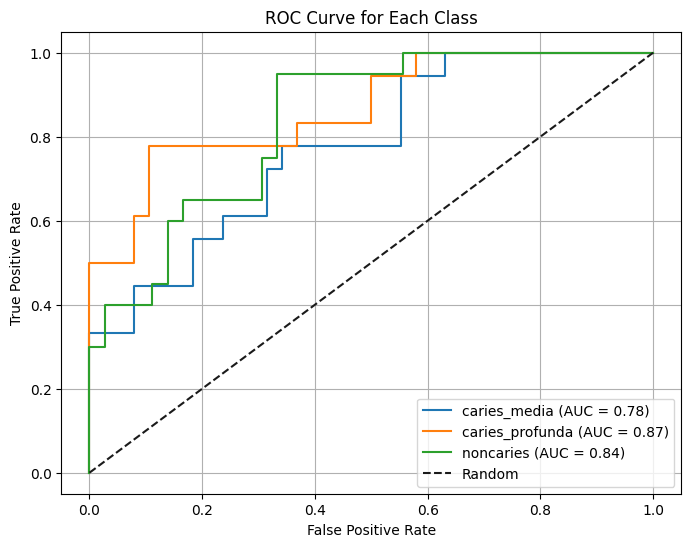

In [17]:

# Ambil semua gambar dari folder test
test_images = list(Path('/content/dataset/test').rglob('*.jpg'))

# Ambil kelas dari model
classes_dict = model.names
classes = [classes_dict[i] for i in range(len(classes_dict))]  # Ubah ke list ['noncaries', 'caries_media', ...]

num_classes = len(classes)

# Prediksi semua gambar
y_true = []
y_score = []

for img_path in test_images:
    label = img_path.parent.name
    label_idx = classes.index(label)

    result = model(img_path, verbose=False)[0]
    probs = result.probs.data.cpu().numpy()

    y_true.append(label_idx)
    y_score.append(probs)

# One-hot encoding dan AUC
y_true = label_binarize(y_true, classes=list(range(num_classes)))
y_score = np.array(y_score)

fpr, tpr, roc_auc = {}, {}, {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot grafik
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'{classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.grid()
plt.show()

WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-scale prediction.
WARNING ⚠️ ClassificationModel does not support 'augment=True' prediction. Reverting to single-s

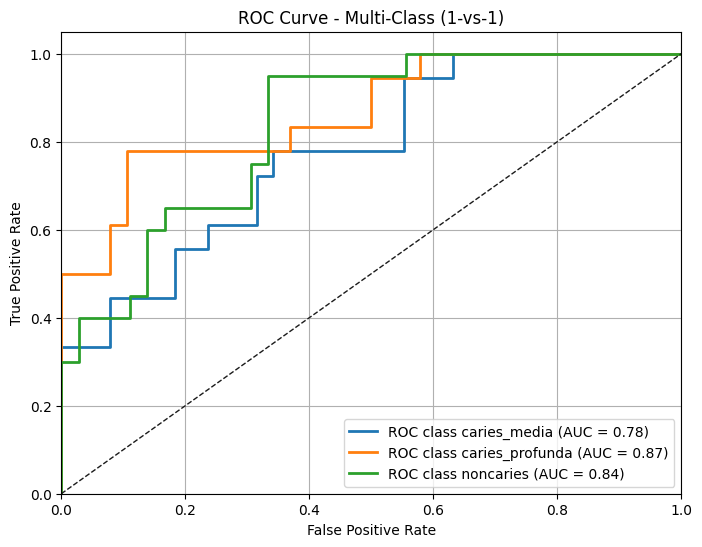

In [18]:
from pathlib import Path
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Ambil semua gambar dari folder test
test_images = list(Path('/content/dataset/test').rglob('*.jpg'))

# Ambil kelas dari model
classes_dict = model.names
classes = [classes_dict[i] for i in range(len(classes_dict))]

num_classes = len(classes)

# Simpan label ground truth dan prediksi probabilitas
y_true = []
y_score = []

for img_path in test_images:
    label = img_path.parent.name
    label_idx = classes.index(label)
    y_true.append(label_idx)

    # Prediksi menggunakan model
    result = model(img_path, verbose=False)[0]
    probs = result.probs.data.tolist()  # Probabilitas prediksi
    y_score.append(probs)

# Binarisasi label
y_true_bin = label_binarize(y_true, classes=list(range(num_classes)))  # shape (n_samples, n_classes)
y_score = np.array(y_score)

# Plot ROC untuk setiap kelas
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'ROC class {classes[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multi-Class (1-vs-1)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [19]:
import shutil

folder_path = "/content/runs"
zip_path = "/content/runs.zip"

shutil.make_archive(zip_path.replace(".zip", ""), 'zip', folder_path)

from google.colab import files
files.download(zip_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>